# Comparing Sentence witin a Cluster

In [1]:
"""
This is a simple application for sentence embeddings: clustering
Sentences are mapped to sentence embeddings and then agglomerative clustering with a threshold is applied.
"""
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

pd.set_option("display.max_rows", 600)
pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", 400)

embedder = SentenceTransformer('all-mpnet-base-v2')
pd_cluster = pd.read_csv('D:\\NLP\\Frame_NLP\\archive\\Sent_Cluster\\labeled_clusters99.csv')


In [2]:
pd_cluster.head()

,Processed_Title,label_st1,label,category
0,"US coronavirus death toll rises to 14, most cases in Washington",85,reports_case_coronavirus_death,rises_37_coronavirus_death
1,"Iran rejects U.S. offer for coronavirus aid, cites conspiracy theory",17,recover_coronavirus_death,refuses_offer_coronavirus_conspiracy
2,TSA is making 3 changes to stop coronavirus from spreading on planes,-1,coronavirus_coronavirus_pandemic,expands_change_airport_coronavirus
3,NBA Players to Take Pay Cut Amidst Coronavirus Crisis,64,coronavirus_coronavirus_player,preparing_cut_coronavirus_game
4,"Coronavirus Cases confirmed in North Korea, say officials",21,vote_kit_coronavirus_case,coronavirus_exercise_case_week


## Small Cluster Sentence Similarity Checker

In [3]:
# Corpus with example sentences
corpus_sents = pd_cluster[pd_cluster['category']=='reports_case_coronavirus_tally']

corpus_sents.head()

,Processed_Title,label_st1,label,category
128,"CDC reports 3,416,428 coronavirus cases",85,reports_case_coronavirus_death,reports_case_coronavirus_tally
1411,U.S. coronavirus cases surpass 2.5 million: Reuters tally,85,reports_case_coronavirus_death,reports_case_coronavirus_tally
5191,"U.S. CDC reports 2,459,472 coronavirus cases",85,reports_case_coronavirus_death,reports_case_coronavirus_tally
5679,"U.S. CDC reports 4,024,492 coronavirus cases",85,reports_case_coronavirus_death,reports_case_coronavirus_tally
5899,"U.S. CDC reports 3,416,428 coronavirus cases",85,reports_case_coronavirus_death,reports_case_coronavirus_tally


In [4]:
corpus = corpus_sents['Processed_Title'].tolist()
corpus[:20]

['CDC reports 3,416,428 coronavirus cases',
 'U.S. coronavirus cases surpass 2.5 million: Reuters tally',
 'U.S. CDC reports 2,459,472 coronavirus cases',
 'U.S. CDC reports 4,024,492 coronavirus cases',
 'U.S. CDC reports 3,416,428 coronavirus cases',
 'U.S. surpasses 4 million confirmed coronavirus cases',
 'US hits 2.5M coronavirus cases as states tally record one day highs',
 "US' coronavirus tally crosses 2.5 million mark, toll at 125,480"]

In [5]:
corpus_embeddings = embedder.encode(corpus)

In [6]:
# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(
    [corpus_embeddings[0]],
    corpus_embeddings[1:]
)


array([[0.7642198 , 0.864316  , 0.85839444, 0.96826077, 0.7654677 ,
        0.6424755 , 0.6363677 ]], dtype=float32)

In [31]:
import pickle

#Store sentences & embeddings on disc
with open('embeddings_reports_case_coronavirus_tally.pkl', "wb") as fOut:
    pickle.dump({'sentences': sentences, 'embeddings': corpus_embeddings}, fOut, protocol=pickle.HIGHEST_PROTOCOL)

#Load sentences & embeddings from disc
with open('embeddings_reports_case_coronavirus_tally.pkl', "rb") as fIn:
    stored_data = pickle.load(fIn)
    stored_sentences = stored_data['sentences']
    stored_embeddings = stored_data['embeddings']


NameError: name 'var' is not defined

## Integrated Cluster Similarity Checker

In [7]:
# Corpus with example sentences
corpus_sents = pd_cluster[pd_cluster['label']=='reports_case_coronavirus_death']

corpus_sents.head()

,Processed_Title,label_st1,label,category
0,"US coronavirus death toll rises to 14, most cases in Washington",85,reports_case_coronavirus_death,rises_37_coronavirus_death
36,27 coronavirus patients recover in Landikotal,85,reports_case_coronavirus_death,records_death_coronavirus_patient
61,Coronavirus toll reaches 37 in Washington,85,reports_case_coronavirus_death,rises_37_coronavirus_death
63,"Indiana Announces 2 More Coronavirus Deaths, Bringing Total To 6",85,reports_case_coronavirus_death,announces_death_coronavirus_total
107,"Coronavirus live updates: US surpasses 65,000 COVID 19 deaths",85,reports_case_coronavirus_death,coronavirus_coronavirus_case


In [8]:
len(corpus_sents)

336

In [9]:
corpus = corpus_sents['Processed_Title'].tolist()
corpus[:20]

['US coronavirus death toll rises to 14, most cases in Washington',
 '27 coronavirus patients recover in Landikotal',
 'Coronavirus toll reaches 37 in Washington',
 'Indiana Announces 2 More Coronavirus Deaths, Bringing Total To 6',
 'Coronavirus live updates: US surpasses 65,000 COVID 19 deaths',
 'CDC reports 3,416,428 coronavirus cases',
 'Coronavirus is now the leading cause of death in America, doctor says',
 '20 Million Americans May Have Been Infected With New Coronavirus: CDC',
 'Indonesia capital shuts schools as coronavirus cases spread',
 'Coronavirus cases spike in Washington, DC',
 'City in Washington State Drives Hospitalizations Down In Coronavirus Battle',
 'Coronavirus death toll reaches 106',
 'Coronavirus updates: Coronavirus infections in U.S. top 500',
 "Reese Witherspoon 'overwhelmed' by Nashville tornado and coronavirus",
 'Coronavirus cases surpass 100,000 worldwide',
 'Two new coronavirus deaths, as national total hits 37',
 'The US coronavirus death toll has s

In [10]:
corpus_embeddings = embedder.encode(corpus)

In [11]:
# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(
    [corpus_embeddings[0]],
    corpus_embeddings[1:]
)


array([[0.43751204, 0.7907783 , 0.6034949 , 0.69649065, 0.61171204,
        0.65428877, 0.6573285 , 0.42380923, 0.7205825 , 0.6262196 ,
        0.68909955, 0.6228969 , 0.34283704, 0.6361265 , 0.7316737 ,
        0.71087563, 0.3455747 , 0.33809835, 0.67080986, 0.70500845,
        0.80383825, 0.6036575 , 0.3695128 , 0.5957333 , 0.6180326 ,
        0.6082727 , 0.3892985 , 0.49218974, 0.51587594, 0.36144945,
        0.65218496, 0.38469124, 0.50941133, 0.70521855, 0.51053405,
        0.35867622, 0.68067306, 0.60374117, 0.67806077, 0.7096803 ,
        0.38674867, 0.6672163 , 0.69777286, 0.45863053, 0.5335084 ,
        0.5722612 , 0.572808  , 0.4853076 , 0.5280967 , 0.5202997 ,
        0.6208613 , 0.66105175, 0.49039733, 0.3873346 , 0.637841  ,
        0.4713703 , 0.5611273 , 0.61556417, 0.32438225, 0.53679526,
        0.674     , 0.61474574, 0.6099124 , 0.50770646, 0.92137665,
        0.72260463, 0.7047379 , 0.5073754 , 0.3340471 , 0.61712676,
        0.49375045, 0.5489174 , 0.78325593, 0.57

## Simple ReClustering 

In [33]:
# Perform kmean clustering
clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5) #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in clustered_sentences.items():
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  12
['US coronavirus death toll rises to 14, most cases in Washington', 'Two new coronavirus deaths, as national total hits 37', "Nevada's Reported Death Toll From Coronavirus Exceeds 140", 'US coronavirus death toll jumps to 14', 'U.S. coronavirus deaths top 16,000: Reuters tally', 'U.S. Coronavirus Cases Reach 149, With 11 Deaths Reported', 'Coronavirus: 14 Deaths Now In U.S. New Cases In Maryland, Colorado', '593 health workers volunteer to fight coronavirus', 'US coronavirus death toll rises to 12: All the latest updates', 'Nevada has 94 new coronavirus cases, pushing total to 1,836', 'coronavirus deaths top 16,000 Reuters tally', 'Total number of coronavirus deaths increases to 4,934', 'Five more die of coronavirus in Swat', '2 More Doctors Fall Victim To Coronavirus', 'Eight more fall victim to coronavirus in Swat, Nowshera', '14 now dead of coronavirus in Seattle area', 'Coronavirus: 11 more fatalities in Republic brings death toll to 1,592', "Arizona's coronavirus death

## UMAP Clustering

NameError: name 'outliers' is not defined

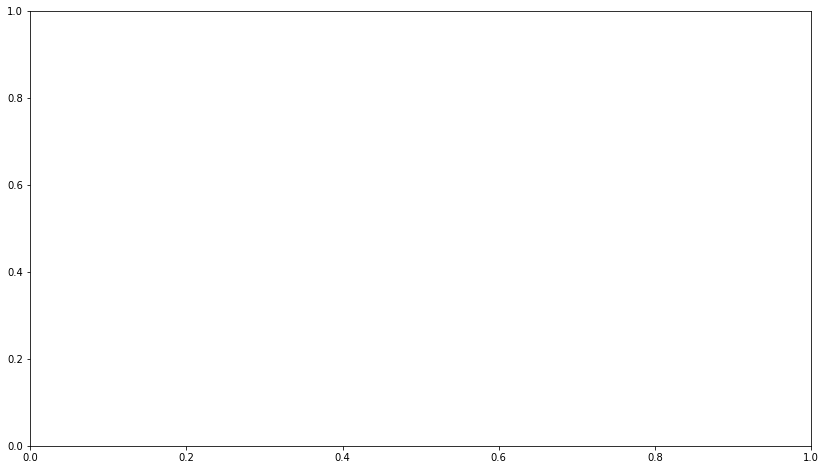

In [21]:
import matplotlib.pyplot as plt
umap_data = umap.UMAP(n_neighbors=6, 
                          n_components=2, 
                          min_dist = 0.1,  
                          #metric='cosine,
                          random_state=42).fit_transform(corpus_embeddings)

point_size = 100.0 / np.sqrt(corpus_embeddings.shape[0])
    
result = pd.DataFrame(umap_data, columns=['x', 'y'])

fig, ax = plt.subplots(figsize=(14, 8))
plt.scatter(outliers.x, outliers.y, color = 'lightgrey', s=point_size)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=point_size, cmap='jet')
plt.colorbar()
plt.show()
    

In [12]:
plot_clusters(corpus_embeddings, clusters, )

## HDBSAN Clustering

In [13]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

## Paraphrase Mining

### Import Model

In [23]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-mpnet-base-v2')

In [24]:
# Single list of sentences - Possible tens of thousands of sentences

sentences = corpus
type(sentences)

list

In [69]:
paraphrases = util.paraphrase_mining(model, sentences)

for paraphrase in paraphrases[0:10]:
    score, i, j = paraphrase
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], score))

Oregon Reports Another Big Spike in Coronavirus Cases 		 Oregon reports another big spike in coronavirus cases 		 Score: 1.0000
Indiana's Coronavirus Hospitalizations Highest in Month 		 Indiana's coronavirus hospitalizations highest in month 		 Score: 1.0000
Washington anglers protest coronavirus fishing closure 		 Washington Anglers Protest Coronavirus Fishing Closure 		 Score: 1.0000
Indonesian capital closes schools for 2 weeks due to coronavirus. 		 Indonesian capital closes schools for two weeks due to coronavirus. 		 Score: 0.9973
Five key developments on the spread of coronavirus in the US this week 		 Five key developments this week on the spread of coronavirus in the US 		 Score: 0.9917
Coronavirus: Cases rise to over 24,500 775 dead 10 points 		 Coronavirus: Cases rise to over 24,500 775 dead 5 points 		 Score: 0.9890
U.S. CDC reports 304,826 coronavirus cases, 7,616 deaths 		 CDC reports 304,826 coronavirus cases, 7,616 deaths 		 Score: 0.9826
Indonesia reports 1,761 new co

In [25]:
paraphrases = util.paraphrase_mining(model, sentences, corpus_chunk_size=len(sentences), top_k=1)

In [26]:
f = open('D://NLP//Frame_NLP//archive//Para_reports_case_coronavirus_death.txt', 'w', encoding='utf-8')
for paraphrase in paraphrases[20:100]:
    score, i, j = paraphrase
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], score), file=f)
f.close()

In [28]:
para = pd.read_csv('D://NLP//Frame_NLP//archive//Para_reports_case_coronavirus_death.txt', sep='\t\t', header=None)
para.head(100)

,0,1,2
0,Indonesia capital shuts schools as coronavirus cases spread,Indonesian capital closes schools due to coronavirus concerns,Score: 0.9593
1,Coronavirus cases top 8 million across world,Worldwide coronavirus cases surpass eight million,Score: 0.9583
2,"CDC reports 2,104,346 coronavirus cases, 116,140 deaths","CDC reports 304,826 coronavirus cases, 7,616 deaths",Score: 0.9571
3,"Indonesia confirms 64 new coronavirus cases, 10 new deaths","Indonesia reports 467 new coronavirus cases, 28 deaths",Score: 0.9571
4,"Indonesia reports 325 new coronavirus cases, total 6,248","Indonesia reports 292 new coronavirus cases, 31 new deaths",Score: 0.9569
5,Indonesia reports 831 coronavirus deaths,"Indonesia reports 1,761 new coronavirus cases, 89 deaths",Score: 0.9522
6,Indonesia transport minister has coronavirus,Indonesia transport minister contracts coronavirus,Score: 0.9503
7,"Coronavirus cases top 335,000 worldwide: Live updates","Coronavirus cases top 721,000 globally: Live updates",Score: 0.9502
8,"189 new coronavirus cases in MP, two deaths","73 new coronavirus patients in MP, tally 2,788, six deaths",Score: 0.9491
9,"Coronavirus cases surpass 100,000 worldwide","Global coronavirus cases reach 100,000",Score: 0.9477


### Similarity between Clusters

In [32]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')




# Two lists of sentences
sentences1 = ['The cat sits outside',
             'A man is playing guitar',
             'The new movie is awesome']

sentences2 = ['The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great']

#Compute embedding for both lists
embeddings1 = model.encode(sentences1, convert_to_tensor=True)
embeddings2 = model.encode(sentences2, convert_to_tensor=True)

#Compute cosine-similarits
cosine_scores = util.pytorch_cos_sim(embeddings1, embeddings2)

#Output the pairs with their score
for i in range(len(sentences1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i], sentences2[i], cosine_scores[i][i]))

The cat sits outside 		 The dog plays in the garden 		 Score: 0.2838
A man is playing guitar 		 A woman watches TV 		 Score: -0.0328
The new movie is awesome 		 The new movie is so great 		 Score: 0.8939


In [ ]:
# Corpus with example sentences
corpus_sents = pd_cluster[pd_cluster['category']=='reports_case_coronavirus_tally']

corpus_sents.head()
corpus = corpus_sents['Processed_Title'].tolist()
corpus[:20]